In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Clean Radii Data

In [3]:
df_radii = pd.read_excel("charge_radii.xlsx")
df_radii.head()

,z,symbol,n,a,radius_val,radius_unc,radius_preliminary_val,radius_preliminary_unc
0,0,n,1,1,-0.1149,0.0027,NaN,NaN
1,1,H,0,1,0.8783,0.0086,NaN,NaN
2,1,H,1,2,2.1421,0.0088,NaN,NaN
3,1,H,2,3,1.7591,0.0363,NaN,NaN
4,2,He,1,3,1.9661,0.0030,NaN,NaN


In [4]:
df_radii.describe()

,z,n,a,radius_val,radius_unc,radius_preliminary_val,radius_preliminary_unc
count,957.000000,957.000000,957.000000,909.000000,909.000000,147.000000,147.000000
mean,54.748171,76.220481,130.968652,4.715438,0.016946,4.710833,0.010620
std,23.598461,36.057028,59.404798,0.817895,0.038789,0.976440,0.006803
min,0.000000,0.000000,1.000000,-0.114900,0.001000,2.361000,0.000000
25%,38.000000,51.000000,90.000000,4.305200,0.003000,3.998550,0.004800
50%,56.000000,80.000000,137.000000,4.880700,0.005100,5.252500,0.008300
75%,76.000000,105.000000,182.000000,5.381200,0.015800,5.514100,0.017600
max,96.000000,152.000000,248.000000,5.904800,0.313900,5.761400,0.029200


Check condition where both normal and preliminary exist

In [6]:
df_both = df_radii.dropna()
df_both.describe()

,z,n,a,radius_val,radius_unc,radius_preliminary_val,radius_preliminary_unc
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,65.222222,92.020202,157.242424,4.960840,0.009870,4.961735,0.010437
std,26.214405,40.437652,66.393861,0.906047,0.006138,0.908078,0.006720
min,4.000000,3.000000,7.000000,2.355000,0.001600,2.361000,0.000000
25%,58.500000,72.000000,130.500000,4.803050,0.004700,4.803050,0.004700
50%,81.000000,107.000000,188.000000,5.401700,0.007200,5.401700,0.007600
75%,84.000000,122.000000,205.500000,5.532950,0.017600,5.532950,0.017500
max,87.000000,141.000000,228.000000,5.739900,0.017900,5.761400,0.025900


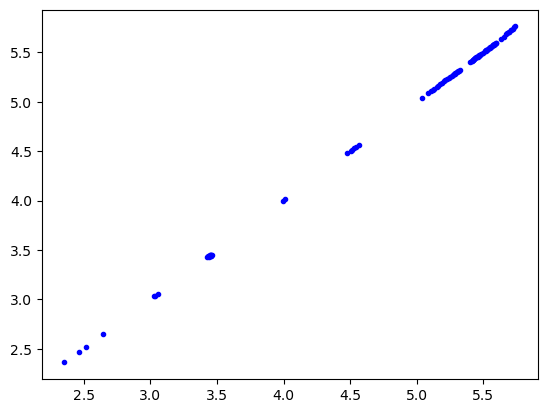

In [7]:
plt.plot(df_both["radius_val"],df_both["radius_preliminary_val"],"b.")

Need to merge radius values and preliminary values into one column. These columns provide the same information, but differ by whether or not the data has gone through peer review.<br>
Merge condition: if value in both preliminary and normal, take normal. If only in preliminary or only in normal, take existing value.

In [9]:
df_radii_merged = df_radii.copy()
missing_radii = df_radii["radius_val"].isna()
for i in range(len(missing_radii)):
    if missing_radii[i] == True:
        df_radii_merged.loc[i, 'radius_val'] = df_radii.loc[i,"radius_preliminary_val"]
        df_radii_merged.loc[i, 'radius_unc'] = df_radii.loc[i,"radius_preliminary_unc"]
df_radii_merged.drop(["radius_preliminary_val","radius_preliminary_unc"],axis=1,inplace=True)
df_radii_merged.sort_values(by=['z','n'], inplace=True)
df_radii_merged.reset_index(inplace=True)
df_radii_merged.describe()

,index,z,n,a,radius_val,radius_unc
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,478.000000,54.748171,76.220481,130.968652,4.689252,0.016648
std,276.406404,23.598461,36.057028,59.404798,0.830347,0.037857
min,0.000000,0.000000,0.000000,1.000000,-0.114900,0.001000
25%,239.000000,38.000000,51.000000,90.000000,4.261100,0.003100
50%,478.000000,56.000000,80.000000,137.000000,4.849600,0.005200
75%,717.000000,76.000000,105.000000,182.000000,5.380500,0.016100
max,956.000000,96.000000,152.000000,248.000000,5.904800,0.313900


z, n, and a are all real integer numbers representing the number of protons, number of neutrons, and mass number respectively. radius_val and radius_unc are real float numbers.

## Clean Mass Data

In [12]:
df_mass = pd.read_excel("nuclear_mass.xlsx")
df_mass = df_mass.replace(to_replace='#', value='', regex=True)
df_mass = df_mass.replace(to_replace=' ', value='', regex=True)
for col in ['MASS EXCESS', 'MASS EXCESS UNC', 'BINDING ENERGY/A', 'BINDING ENERGY UNC', 'ATOMIC MASS', 'ATOMIC MASS UNC']:
    df_mass[col] = df_mass[col].astype(float)

# correct download issue
for i in range(len(df_mass)):
    if df_mass.index[i] < 1138:
        pass
    elif df_mass.index[i] < 2748:
        df_mass.loc[i, "ATOMIC MASS"] = df_mass.loc[i, "ATOMIC MASS"] + 1e8
    else:
        df_mass.loc[i, "ATOMIC MASS"] = df_mass.loc[i, "ATOMIC MASS"] + 2e8
df_mass.head()

,N-Z,N,Z,A,EL,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC
0,1,1,0,1,n,8071.318060,0.000440,0.00000,0.0000,1.008665e+06,0.000470
1,-1,0,1,1,H,7288.971064,0.000013,0.00000,0.0000,1.007825e+06,0.000014
2,0,1,1,2,H,13135.722895,0.000015,1112.28310,0.0002,2.014102e+06,0.000015
3,1,2,1,3,H,14949.810900,0.000080,2827.26540,0.0003,3.016049e+06,0.000080
4,-1,1,2,3,He,14931.218880,0.000060,2572.68044,0.0001,3.016029e+06,0.000060


In [13]:
df_mass.describe()

,N-Z,N,Z,A,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC
count,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000,3.558000e+03,3558.000000
mean,24.474986,82.442945,57.967960,140.410905,-22351.963671,123.642258,7945.763478,1.606943,1.403869e+08,132.719310
std,17.861093,43.678883,28.032564,71.192136,57610.095657,192.928417,740.869722,9.668407,7.122482e+07,207.087471
min,-8.000000,0.000000,0.000000,1.000000,-91652.843000,0.000000,-2267.000000,0.000000,1.007825e+06,0.000000
25%,10.000000,47.000000,36.000000,84.000000,-64520.999500,2.767250,7711.765925,0.022925,8.391491e+07,2.969500
50%,22.000000,81.000000,58.000000,139.000000,-37758.017500,13.720000,8059.356650,0.090150,1.389422e+08,14.728000
75%,38.000000,115.000000,80.000000,194.000000,3337.464500,200.000000,8354.983225,1.000750,1.939868e+08,215.000000
max,64.000000,177.000000,118.000000,295.000000,201369.000000,2003.000000,8794.555500,401.000000,2.952162e+08,2150.000000


In [14]:
# only choose nuclides that are in radii dataset
for i in range(len(df_mass)):
    in_radii = False
    for j in range(len(df_radii)):
        if df_mass.loc[i,"Z"] == df_radii.loc[j,"z"] and df_mass.loc[i,"N"] == df_radii.loc[j,"n"]:
            in_radii = True
    if in_radii == False:
        df_mass.drop(i,axis=0,inplace=True)
    if i%100 == 0:
        print(i)
df_mass.sort_values(by=['Z','N'], inplace=True)
df_mass.reset_index(inplace=True)
df_mass.describe()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


,index,N-Z,N,Z,A,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,9.570000e+02,957.000000
mean,1667.126437,21.472309,76.220481,54.748171,130.968652,-50015.910316,6.560207,8147.680713,0.054114,1.309150e+08,7.042266
std,895.397083,13.603797,36.057028,23.598461,59.404798,34668.444214,14.534151,694.654949,0.185514,5.941365e+07,15.603048
min,0.000000,-4.000000,0.000000,0.000000,1.000000,-91652.843000,0.000000,0.000000,0.000000,1.007825e+06,0.000000
25%,980.000000,10.000000,51.000000,38.000000,90.000000,-78144.769000,0.704000,7912.066600,0.005900,8.990714e+07,0.755000
50%,1743.000000,21.000000,80.000000,56.000000,137.000000,-61012.171000,2.301000,8237.928600,0.020100,1.369146e+08,2.470000
75%,2505.000000,31.000000,105.000000,76.000000,182.000000,-26937.498000,8.445000,8509.612000,0.061600,1.819747e+08,9.065000
max,3276.000000,56.000000,152.000000,96.000000,248.000000,67392.748000,300.166000,8794.555500,4.502400,2.480723e+08,322.241000


In [15]:
df_mass.head()

,index,N-Z,N,Z,A,EL,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC
0,0,1,1,0,1,n,8071.318060,0.000440,0.00000,0.0000,1.008665e+06,0.000470
1,1,-1,0,1,1,H,7288.971064,0.000013,0.00000,0.0000,1.007825e+06,0.000014
2,2,0,1,1,2,H,13135.722895,0.000015,1112.28310,0.0002,2.014102e+06,0.000015
3,3,1,2,1,3,H,14949.810900,0.000080,2827.26540,0.0003,3.016049e+06,0.000080
4,4,-1,1,2,3,He,14931.218880,0.000060,2572.68044,0.0001,3.016029e+06,0.000060


## Clean Lifetime Data

In [17]:
df_lifetime = pd.read_csv("lifetime.csv")
df_lifetime.head()

,Z,N,symbol,jp,half_life [s],unc,decay,decay %,unc.1,decay.1,decay %.1,unc.2,decay.2,decay %.2,unc.3
0,0,1,n,1/2+,6.139000e+02,0.6,B-,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,4,n,0+,1.750000e-22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,6,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,H,1/2+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,H,1+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_lifetime.describe()

,Z,N,half_life [s],unc,decay %,unc.1,decay %.1,unc.2,decay %.2,unc.3
count,3378.000000,3378.000000,2.954000e+03,2.800000e+03,2926.000000,329.000000,1012.000000,6.600000e+02,133.000000,7.300000e+01
mean,57.196270,81.388396,8.295398e+28,4.501209e+27,97.396480,2.942312,16.202548,2.796603e+00,5.153072,1.194054e+00
std,27.177974,42.182376,4.471077e+30,2.381176e+29,10.750887,4.930970,22.847694,5.569797e+00,9.548541,2.104178e+00
min,0.000000,0.000000,8.610000e-23,0.000000e+00,0.000000,0.000003,0.000000,2.000000e-12,0.000000,6.000000e-13
25%,36.000000,48.000000,1.670000e-01,1.300000e-02,100.000000,0.060000,0.200000,5.000000e-02,0.003200,2.000000e-03
50%,58.000000,81.000000,1.230000e+01,6.000000e-01,100.000000,1.000000,6.000000,8.000000e-01,0.900000,2.000000e-01
75%,79.000000,112.000000,1.374000e+03,2.520000e+01,100.000000,4.000000,25.000000,3.000000e+00,7.600000,1.800000e+00
max,118.000000,178.000000,2.430000e+32,1.260000e+31,100.000000,35.000000,100.000000,8.000000e+01,50.000000,1.000000e+01


In [19]:
# only choose nuclides that are in radii dataset
for i in range(len(df_lifetime)):
    in_radii = False
    for j in range(len(df_radii)):
        if df_lifetime.loc[i,"Z"] == df_radii.loc[j,"z"] and df_lifetime.loc[i,"N"] == df_radii.loc[j,"n"]:
            in_radii = True
    if in_radii == False:
        df_lifetime.drop(i,axis=0,inplace=True)
    if i%100 == 0:
        print(i)
df_lifetime.sort_values(by=['Z','N'], inplace=True)
df_lifetime.reset_index(inplace=True)
df_lifetime.describe()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300


,index,Z,N,half_life [s],unc,decay %,unc.1,decay %.1,unc.2,decay %.2,unc.3
count,957.000000,957.000000,957.000000,7.120000e+02,6.980000e+02,702.000000,97.000000,231.000000,1.870000e+02,2.000000e+01,1.000000e+01
mean,1611.873563,54.748171,76.220481,3.441658e+29,1.805642e+28,98.062107,1.960127,10.123513,1.189453e+00,1.544525e+00,1.051463e-01
std,866.311909,23.598461,36.057028,9.106961e+30,4.769169e+29,8.516888,4.439792,19.332420,2.952755e+00,4.918907e+00,1.660374e-01
min,0.000000,0.000000,0.000000,8.750000e-03,5.000000e-05,0.000000,0.000003,0.000000,9.000000e-12,1.000000e-14,3.000000e-12
25%,900.000000,38.000000,51.000000,3.335000e+01,4.000000e-01,100.000000,0.010000,0.010350,3.500000e-03,4.850000e-11,1.450000e-04
50%,1622.000000,56.000000,80.000000,1.127100e+03,1.200000e+01,100.000000,0.250000,0.670000,7.000000e-02,5.450000e-04,5.500000e-03
75%,2411.000000,76.000000,105.000000,2.428726e+05,3.600000e+02,100.000000,2.000000,11.150000,1.000000e+00,5.500000e-01,1.675000e-01
max,3132.000000,96.000000,152.000000,2.430000e+32,1.260000e+31,100.000000,30.000000,100.000000,3.000000e+01,2.200000e+01,5.000000e-01


In [20]:
print(df_lifetime.columns)

Index(['index', 'Z', 'N', 'symbol', ' jp', ' half_life [s]', ' unc', ' decay',
       ' decay %', ' unc.1', ' decay.1', ' decay %.1', ' unc.2', ' decay.2',
       ' decay %.2', ' unc.3'],
      dtype='object')


Insert column radioactive, if half_life [s] is NaN that means the isotope is stable and does not decay.

In [22]:
df_lifetime["radioactive"] = True # creates a new column  radioactive in the data frame where every row has value True
df_lifetime.loc[df_lifetime[" half_life [s]"].isnull() == True, "radioactive"] = False # this makes rows where half_life is NaN have the value False in radioactive
df_lifetime.loc[df_lifetime[" half_life [s]"].isnull() == True, " decay"] = "stable"

Remove unc columns since missingness is not consistent and many values are 0 for half_life unc which is not a real value. Also remove secondary and tertiary decay paths, and the decay%. Remove symbol since this is the same as Z. Just take the decay path as a category and jp as a category

In [24]:
df_lifetime.drop([' unc',' unc.1',' unc.2',' unc.3',' decay.1', ' decay %.1', ' decay.2', ' decay %.2', ' decay %', 'symbol'],axis=1,inplace=True)

Impute mean into half life column so that stable isotopes have a value. Stable isotopes can be seen from the radioactive column.

In [26]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN)

# impute after temporarily removing the methods column
X = df_lifetime.drop(columns=[" jp"," decay"],axis=1)
imputed_X = my_imp.fit_transform(X)

# create DataFrame with correct column names and index
fixed_X = pd.DataFrame(imputed_X, columns=X.columns, index=X.index)

# add the 'method' column back
fixed_df = pd.concat([fixed_X, df_lifetime[" jp"]], axis=1)
fixed_df = pd.concat([fixed_df, df_lifetime[" decay"]], axis=1)

# ensure the columns are in the same order as the original DataFrame
fixed_df = fixed_df[df_lifetime.columns]


In [27]:
fixed_df.describe()

,index,Z,N,half_life [s],radioactive
count,957.000000,957.000000,957.000000,9.570000e+02,957.000000
mean,1611.873563,54.748171,76.220481,3.441658e+29,0.743992
std,866.311909,23.598461,36.057028,7.853791e+30,0.436655
min,0.000000,0.000000,0.000000,8.750000e-03,0.000000
25%,900.000000,38.000000,51.000000,1.440000e+02,0.000000
50%,1622.000000,56.000000,80.000000,3.358800e+04,1.000000
75%,2411.000000,76.000000,105.000000,3.441658e+29,1.000000
max,3132.000000,96.000000,152.000000,2.430000e+32,1.000000


In [28]:
fixed_df.head()

,index,Z,N,jp,half_life [s],decay,radioactive
0,0.0,0.0,1.0,1/2+,6.139000e+02,B-,1.0
1,3.0,1.0,0.0,1/2+,3.441658e+29,stable,0.0
2,4.0,1.0,1.0,1+,3.441658e+29,stable,0.0
3,5.0,1.0,2.0,1/2+,3.887813e+08,B-,1.0
4,10.0,2.0,1.0,1/2+,3.441658e+29,stable,0.0


## Combine Datasets

In [30]:
combined_data = pd.concat([df_radii_merged, df_mass["N-Z"], df_mass["MASS EXCESS"], df_mass["MASS EXCESS UNC"],
                           df_mass["BINDING ENERGY/A"], df_mass["BINDING ENERGY UNC"], df_mass["ATOMIC MASS"],
                           df_mass["ATOMIC MASS UNC"], fixed_df[" jp"], fixed_df[" half_life [s]"], fixed_df[" decay"], fixed_df["radioactive"]], axis=1)

In [31]:
combined_data.head()

,index,z,symbol,n,a,radius_val,radius_unc,N-Z,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC,jp,half_life [s],decay,radioactive
0,0,0,n,1,1,-0.1149,0.0027,1,8071.318060,0.000440,0.00000,0.0000,1.008665e+06,0.000470,1/2+,6.139000e+02,B-,1.0
1,1,1,H,0,1,0.8783,0.0086,-1,7288.971064,0.000013,0.00000,0.0000,1.007825e+06,0.000014,1/2+,3.441658e+29,stable,0.0
2,2,1,H,1,2,2.1421,0.0088,0,13135.722895,0.000015,1112.28310,0.0002,2.014102e+06,0.000015,1+,3.441658e+29,stable,0.0
3,3,1,H,2,3,1.7591,0.0363,1,14949.810900,0.000080,2827.26540,0.0003,3.016049e+06,0.000080,1/2+,3.887813e+08,B-,1.0
4,4,2,He,1,3,1.9661,0.0030,-1,14931.218880,0.000060,2572.68044,0.0001,3.016029e+06,0.000060,1/2+,3.441658e+29,stable,0.0


In [32]:
combined_data.describe()

,index,z,n,a,radius_val,radius_unc,N-Z,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC,half_life [s],radioactive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,9.570000e+02,957.000000,9.570000e+02,957.000000
mean,478.000000,54.748171,76.220481,130.968652,4.689252,0.016648,21.472309,-50015.910316,6.560207,8147.680713,0.054114,1.309150e+08,7.042266,3.441658e+29,0.743992
std,276.406404,23.598461,36.057028,59.404798,0.830347,0.037857,13.603797,34668.444214,14.534151,694.654949,0.185514,5.941365e+07,15.603048,7.853791e+30,0.436655
min,0.000000,0.000000,0.000000,1.000000,-0.114900,0.001000,-4.000000,-91652.843000,0.000000,0.000000,0.000000,1.007825e+06,0.000000,8.750000e-03,0.000000
25%,239.000000,38.000000,51.000000,90.000000,4.261100,0.003100,10.000000,-78144.769000,0.704000,7912.066600,0.005900,8.990714e+07,0.755000,1.440000e+02,0.000000
50%,478.000000,56.000000,80.000000,137.000000,4.849600,0.005200,21.000000,-61012.171000,2.301000,8237.928600,0.020100,1.369146e+08,2.470000,3.358800e+04,1.000000
75%,717.000000,76.000000,105.000000,182.000000,5.380500,0.016100,31.000000,-26937.498000,8.445000,8509.612000,0.061600,1.819747e+08,9.065000,3.441658e+29,1.000000
max,956.000000,96.000000,152.000000,248.000000,5.904800,0.313900,56.000000,67392.748000,300.166000,8794.555500,4.502400,2.480723e+08,322.241000,2.430000e+32,1.000000


In [33]:
combined_data.to_csv("combined_data.csv")